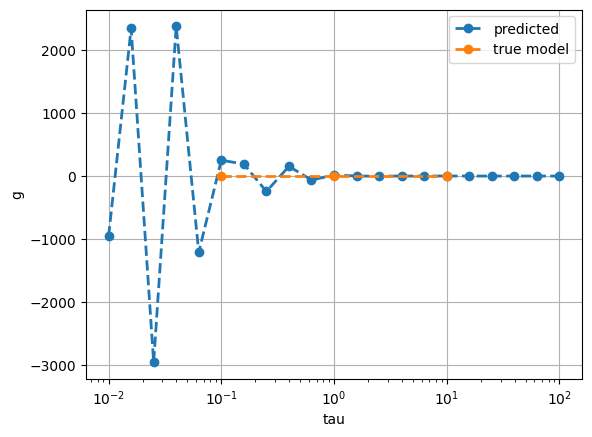

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("G.dat")

n = data.shape[0]
N = 21

t = data[:, 0]
G = data[:, 1]
tau = np.logspace(-2, 2, N)

W = np.zeros((n, n))
A = np.zeros((n, N))
b = G

# Construct W and A matrices
for i in range(n):
    W[i, i] = 1 / (G[i] ** 2)
    for j in range(N):
        A[i, j] = np.exp(-t[i] / tau[j])

# Calculate g
g = np.linalg.solve((W @ A).T @ (W @ A), (W @ A).T @ (W @ b))

# Exact values for comparison
exact_g = np.ones(3)
exact_tau = np.logspace(-1, 1, 3)

# Plotting
plt.semilogx(tau, g, '--o', linewidth=2, label='predicted')
plt.semilogx(exact_tau, exact_g, '--o', linewidth=2, label='true model')
plt.grid(True)
plt.xlabel('tau')
plt.ylabel('g')
plt.legend()
plt.show()


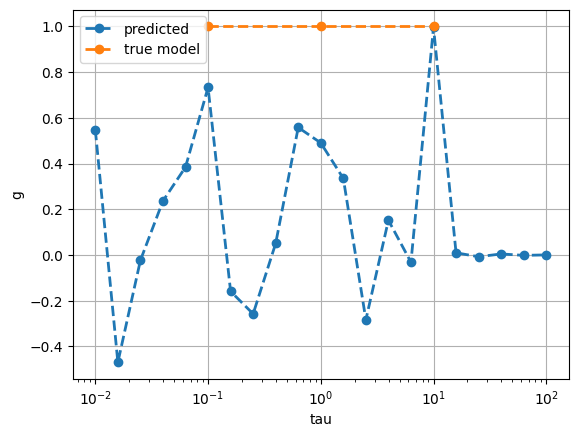

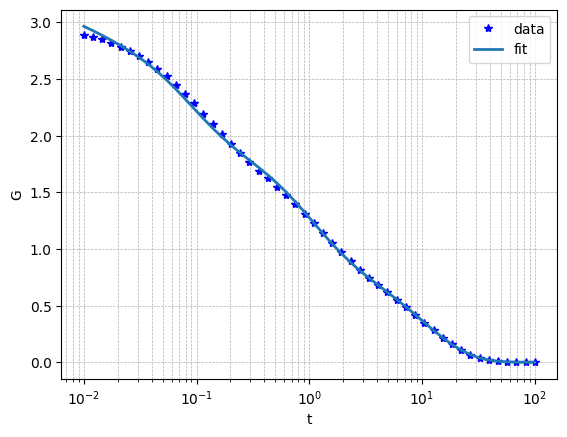

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("G.dat")

n = data.shape[0]
N = 21

t = data[:, 0]
G = data[:, 1]
tau = np.logspace(-2, 2, N)
lambda_reg = 0.1

W = np.zeros((n, n))
A = np.zeros((n, N))
b = G

# Construct W and A matrices
for i in range(n):
    W[i, i] = 1 / (G[i] ** 2)
    for j in range(N):
        A[i, j] = np.exp(-t[i] / tau[j])

# Regularization and solving
L = np.vstack((W @ A, lambda_reg * np.eye(N)))
R = np.hstack((W @ b, np.zeros(N)))
g = np.linalg.solve(L.T @ L, L.T @ R)

# Plot predicted vs true model
plt.figure()
exact_g = np.ones(3)
exact_tau = np.logspace(-1, 1, 3)

plt.semilogx(tau, g, '--o', linewidth=2, label='predicted')
plt.semilogx(exact_tau, exact_g, '--o', linewidth=2, label='true model')
plt.grid(True)
plt.xlabel('tau')
plt.ylabel('g')
plt.legend()
plt.show()

# Plot data and fit
plt.figure()
plt.semilogx(t, G, 'b*', label='data')
plt.semilogx(t, A @ g, linewidth=2, label='fit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('t')
plt.ylabel('G')
plt.legend()
plt.show()
